**Introduction To the Business Problem:

While opening a resturant can be a very lucrative business, a lack of demand causes many resturants to closer to populated and lucrative location where people leaving aound are high in demend with a normal or above normal income.  within the first year of opening we estimating Over 500,000 Dollars. There are many different factors that can account for a resturant's success such as location, Population, Income, purchasing power,competition,and quality of the food. In this project, our analysis will factor on Population, Income and total income of House hold or Borough. The location of our restorant is a key Factor of succes and acheiving our profit margine by the end of the year.  

The goal of this project is to use the Foursquare API find the Cordnate of Toronto and use various statistical method and Machien Learning to detemine which arae with the high population with high income of our target population. Base on a decriptive statitics and exploratory statistics, we will be certain at where to site our restaurant and subsiquently reopen at neighby  Borough in the Future if success.  Additionally, starting a restaurant in a location with higher income would increase the profitability of the business over starting in a poorer area. 

**Business Problem:**
If the client wanted to open an Ice cream and pasteries Restaurant in Toronto, what areas are the best options to open the restaurant and are people with high income likely to think of taking sweets after meals ?


**Data:**

I will use Foursquare API to determine the Longitude and Latitude Cordnate of Toront and use our Chicago data ('New_toronto_test2.csv')average house income in different neighborhoods 
(used to estimate the average income of the inhabitants), population distribution of each area, the number of each household and their income in relation in each neighborhood. The data will then be 
used to Build a machine learning to pridict a significance of either high population and income and Total Household income are likely to purchase our product and to determine the optimal location to open the restaurant.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing 
%matplotlib inline

In [2]:
import fiona as fn
import geopandas 
from descartes.patch import PolygonPatch
from matplotlib.collections import PatchCollection

In [3]:
import json
import html

In [4]:
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('New_toronto_test2.csv')
df.head()

,PostalCode,Borough,Neighbourhood No.,Population,Poplatn dens persqur km,Land area in squr km,Total_Hsehold_income,<5000,5000_to_9999,10000_to_14999,...,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,...,955,1090,1055,1110,2330,2150,1930,1845,1640,9340
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,...,90,120,80,115,230,230,200,195,210,1890
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,...,905,885,905,815,1565,1360,1255,1140,1050,5570
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,...,910,950,955,815,1725,1405,1240,1070,865,3980
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,...,465,520,495,530,935,845,765,615,575,2625


In [6]:
df.columns = df.columns.str.replace(' ','')

In [7]:
df.dropna().head()

,PostalCode,Borough,NeighbourhoodNo.,Population,Poplatndenspersqurkm,Landareainsqurkm,Total_Hsehold_income,<5000,5000_to_9999,10000_to_14999,...,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,...,955,1090,1055,1110,2330,2150,1930,1845,1640,9340
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,...,90,120,80,115,230,230,200,195,210,1890
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,...,905,885,905,815,1565,1360,1255,1140,1050,5570
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,...,910,950,955,815,1725,1405,1240,1070,865,3980
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,...,465,520,495,530,935,845,765,615,575,2625


In [8]:
df.columns

Index(['PostalCode', 'Borough', 'NeighbourhoodNo.', 'Population',
       'Poplatndenspersqurkm', 'Landareainsqurkm', 'Total_Hsehold_income',
       '<5000', '5000_to_9999', '10000_to_14999', '15000_to_19999',
       '20000_to_24999', '25000_to_29999', '30000_to_34999', '35000_to_39999',
       '40000_to_44999', '45000_to_49999', '50000_to_59999', '60000_to_69999',
       '70000_to_79999', '80000_to_89999', '90000_to_99999', '100000>'],
      dtype='object')

In [9]:
df.shape 

(88, 23)

We are performing a basic descriptive statitics on our data, Now we are intrested in only the columns describing the finanacial power of our total population. From Our table we say that there were eighty eight (88)Participant ("Count"). The second column describe the mean of our total Household income and the other fianancial power from those who recieve less than 5000 Dollars to the highest Salary which is 100000 and above. The third column describe the Standard diviation that is how far apart of sample mean deviate from the actual population Mean. 

In [10]:
df.describe()

,NeighbourhoodNo.,Population,Poplatndenspersqurkm,Landareainsqurkm,Total_Hsehold_income,<5000,5000_to_9999,10000_to_14999,15000_to_19999,20000_to_24999,...,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,109.125000,30464.090909,9396.579545,7.087045,12362.159091,381.363636,261.363636,405.056818,597.215909,523.295455,...,521.136364,524.204545,513.636364,496.193182,936.420455,846.931818,757.784091,672.897727,593.068182,3802.045455
std,83.811476,21294.048864,7644.562263,7.166944,8984.461068,510.410432,230.725651,332.751931,433.553122,356.288246,...,353.864322,355.046449,355.393361,349.083360,678.182556,643.094812,586.997943,539.349716,477.304712,3062.686601
min,1.000000,6577.000000,1117.000000,0.950000,2650.000000,40.000000,20.000000,30.000000,45.000000,70.000000,...,60.000000,60.000000,70.000000,75.000000,135.000000,165.000000,140.000000,110.000000,105.000000,430.000000
25%,47.500000,16077.500000,4461.250000,2.482500,6536.250000,148.750000,118.750000,181.250000,268.750000,243.750000,...,248.750000,255.000000,255.000000,240.000000,458.750000,405.000000,387.500000,313.750000,286.250000,1938.750000
50%,95.500000,24190.000000,7025.000000,5.020000,9987.500000,227.500000,177.500000,280.000000,502.500000,412.500000,...,415.000000,417.500000,432.500000,405.000000,740.000000,650.000000,587.500000,515.000000,467.500000,2910.000000
75%,134.750000,32724.750000,11665.000000,8.410000,14827.500000,393.750000,365.000000,532.500000,753.750000,676.250000,...,705.000000,721.250000,640.000000,635.000000,1136.250000,993.750000,876.250000,733.750000,631.250000,4646.250000
max,411.000000,105450.000000,52656.000000,45.740000,45710.000000,2935.000000,1180.000000,1535.000000,1800.000000,1605.000000,...,1555.000000,1630.000000,1575.000000,1615.000000,3220.000000,3305.000000,3150.000000,2805.000000,2580.000000,15740.000000


In [11]:
df2 = df['100000>'].min()

In [12]:
df.groupby(['Borough'])['<5000', '5000_to_9999', '10000_to_14999', '15000_to_19999',
       '20000_to_24999', '25000_to_29999', '30000_to_34999', '35000_to_39999',
       '40000_to_44999', '45000_to_49999', '50000_to_59999', '60000_to_69999',
       '70000_to_79999', '80000_to_89999', '90000_to_99999', '100000>'].max()

,<5000,5000_to_9999,10000_to_14999,15000_to_19999,20000_to_24999,25000_to_29999,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
Borough,,,,,,,,,,,,,,,,
Central Toronto,920,550,860,1290,980,865,820,910,955,950,1915,1745,1555,1400,1200,8055
Downtown Toronto,2510,1180,1535,1695,1520,1440,1370,1425,1485,1460,3085,3305,3150,2805,2580,15740
East Toronto,575,655,1100,1380,1070,930,970,920,875,820,1555,1510,1285,1230,1160,10265
East York,255,275,530,710,670,565,595,535,540,475,890,775,645,620,565,4285
Etobicoke,2540,970,1255,1710,1535,1730,1555,1630,1575,1615,3220,3060,2825,2625,2315,15300
Mississauga,85,70,105,190,235,275,300,280,300,235,540,405,380,315,255,1055
North York,2935,1010,1260,1800,1510,1780,1535,1400,1355,1385,2590,2420,2190,2020,1735,10405
Scarborough,615,580,1000,1320,1100,1440,1320,1305,1260,1205,2350,2150,1930,1845,1640,9340
West Toronto,900,755,1255,1655,1605,1435,1390,1460,1465,1400,2680,2475,2225,2125,1900,12485


In [15]:
df.groupby(['Borough'])['<5000', '5000_to_9999', '10000_to_14999', '15000_to_19999',
       '20000_to_24999', '25000_to_29999', '30000_to_34999', '35000_to_39999',
       '40000_to_44999', '45000_to_49999', '50000_to_59999', '60000_to_69999',
       '70000_to_79999', '80000_to_89999', '90000_to_99999', '100000>'].min()

,<5000,5000_to_9999,10000_to_14999,15000_to_19999,20000_to_24999,25000_to_29999,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
Borough,,,,,,,,,,,,,,,,
Central Toronto,165,75,135,175,160,170,170,170,140,160,280,285,285,240,245,2340
Downtown Toronto,55,75,100,170,135,130,125,115,115,100,165,165,140,120,110,900
East Toronto,190,150,260,295,270,245,225,280,255,295,510,455,410,385,345,2095
East York,55,65,80,130,150,135,110,130,115,115,245,205,200,185,195,925
Etobicoke,45,20,30,45,70,55,60,60,70,75,135,165,145,145,140,1375
Mississauga,85,70,105,190,235,275,300,280,300,235,540,405,380,315,255,1055
North York,40,45,50,80,110,120,145,170,150,125,205,200,160,110,105,430
Scarborough,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,900
West Toronto,45,30,45,70,95,85,95,110,95,100,195,190,195,170,170,2110


In [16]:
df['Borough'].value_counts()

North York          20
Scarborough         17
Downtown Toronto    12
Etobicoke           10
Central Toronto      9
West Toronto         6
East York            5
York                 5
East Toronto         3
Mississauga          1
Name: Borough, dtype: int64

In [17]:
import scipy as spy
from shapely.geometry import Point,Polygon
import descartes

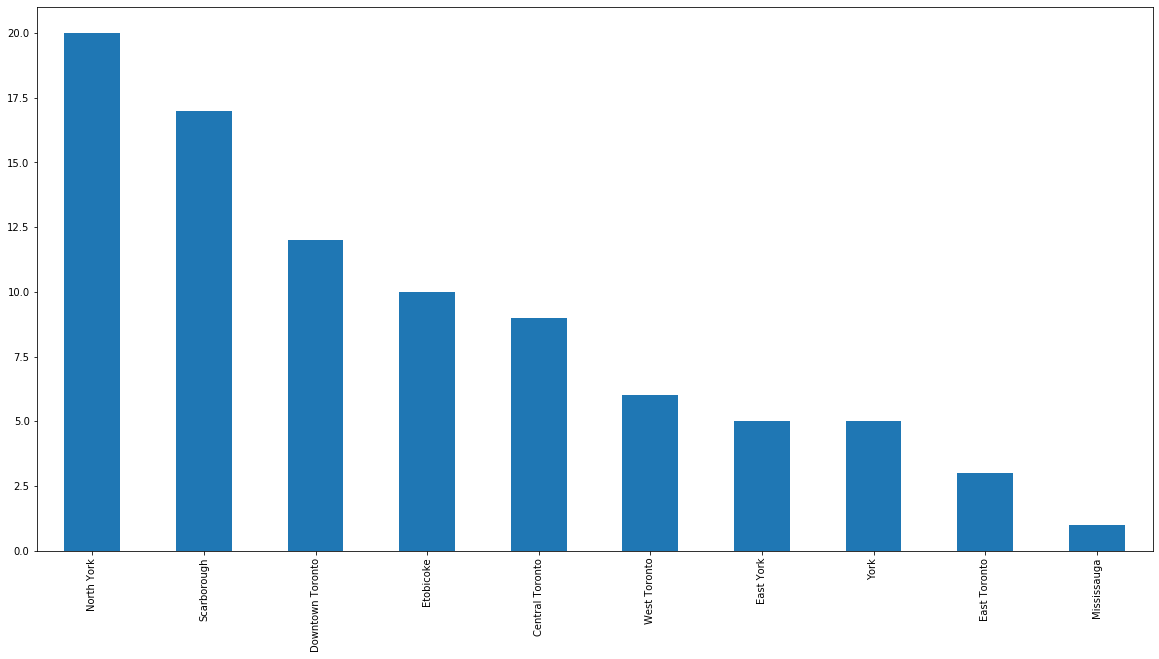

In [18]:
df['Borough'].value_counts().plot(kind = 'bar', figsize = (20,10))

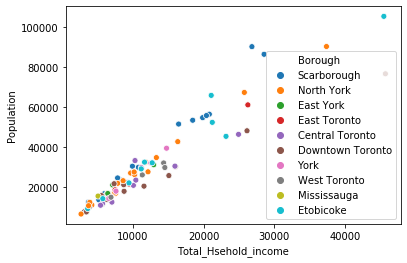

In [19]:
sns.scatterplot(x = 'Total_Hsehold_income', y ='Population', hue = 'Borough',data = df)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 23 columns):
PostalCode              88 non-null object
Borough                 88 non-null object
NeighbourhoodNo.        88 non-null int64
Population              88 non-null int64
Poplatndenspersqurkm    88 non-null int64
Landareainsqurkm        88 non-null float64
Total_Hsehold_income    88 non-null int64
<5000                   88 non-null int64
5000_to_9999            88 non-null int64
10000_to_14999          88 non-null int64
15000_to_19999          88 non-null int64
20000_to_24999          88 non-null int64
25000_to_29999          88 non-null int64
30000_to_34999          88 non-null int64
35000_to_39999          88 non-null int64
40000_to_44999          88 non-null int64
45000_to_49999          88 non-null int64
50000_to_59999          88 non-null int64
60000_to_69999          88 non-null int64
70000_to_79999          88 non-null int64
80000_to_89999          88 non-null int64
90000_to_99

In [21]:
## Droping Some unused Columns in our dara frame 
##drop_cols = ['Neighbourhood No.','Land area in squr km' ]
## df  = df.drop(drop_cols, axis = 1)


We wont to sort our Data by Population, showing from the highest population through to the Lowerst 

In [22]:
df_sort = df.sort_values(by = 'Population', ascending = False).head()
df_sort.head()


,PostalCode,Borough,NeighbourhoodNo.,Population,Poplatndenspersqurkm,Landareainsqurkm,Total_Hsehold_income,<5000,5000_to_9999,10000_to_14999,...,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
80,M9B,Etobicoke,75,105450,14937,26.38,45490,2540,970,1255,...,1555,1630,1575,1615,3220,3060,2825,2625,2315,15300
21,M2M,North York,137,90362,19083,13.80,37370,2935,1010,1260,...,1535,1400,1355,1385,2590,2420,2190,2020,1735,10405
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,...,955,1090,1055,1110,2330,2150,1930,1845,1640,9340
14,M1V,Scarborough,379,86468,12552,19.96,28545,540,375,560,...,1320,1305,1260,1205,2350,2080,1925,1675,1495,8730
71,M6P,West Toronto,268,82712,26438,10.51,37230,900,755,1255,...,1390,1460,1465,1400,2680,2475,2225,2125,1900,12485


In [23]:
df.columns

Index(['PostalCode', 'Borough', 'NeighbourhoodNo.', 'Population',
       'Poplatndenspersqurkm', 'Landareainsqurkm', 'Total_Hsehold_income',
       '<5000', '5000_to_9999', '10000_to_14999', '15000_to_19999',
       '20000_to_24999', '25000_to_29999', '30000_to_34999', '35000_to_39999',
       '40000_to_44999', '45000_to_49999', '50000_to_59999', '60000_to_69999',
       '70000_to_79999', '80000_to_89999', '90000_to_99999', '100000>'],
      dtype='object')

Now, we are doing a basic count by calling the fucntion count to count all participant leaving in unique Borough in our Data set

In [24]:
df['Borough'].value_counts()

North York          20
Scarborough         17
Downtown Toronto    12
Etobicoke           10
Central Toronto      9
West Toronto         6
East York            5
York                 5
East Toronto         3
Mississauga          1
Name: Borough, dtype: int64

In [25]:
def min_max_value(col):
    top = df[col].idxmax()
    top_observ = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bottom_observ = pd.DataFrame (df.loc[bottom])
    
    min_max_observ = pd.concat([top_observ,  bottom_observ], axis = 1)
    return min_max_observ

In [26]:
min_max_value('<5000')

,21,82
PostalCode,M2M,M9L
Borough,North York,North York
NeighbourhoodNo.,137,21
Population,90362,12416
Poplatndenspersqurkm,19083,1570
Landareainsqurkm,13.8,7.91
Total_Hsehold_income,37370,3895
<5000,2935,40
5000_to_9999,1010,50
10000_to_14999,1260,60


In [27]:
min_max_value('100000>')

,47,62
PostalCode,M5A,M6A
Borough,Downtown Toronto,North York
NeighbourhoodNo.,149,112
Population,76716,6577
Poplatndenspersqurkm,25823,3614
Landareainsqurkm,8.01,1.82
Total_Hsehold_income,45710,2650
<5000,1975,50
5000_to_9999,1180,60
10000_to_14999,1535,160


(array([25., 29., 13.,  6.,  5.,  5.,  1.,  0.,  2.,  2.]),
 array([ 2650.,  6956., 11262., 15568., 19874., 24180., 28486., 32792.,
        37098., 41404., 45710.]),
 <a list of 10 Patch objects>)

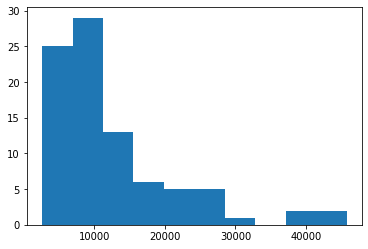

In [28]:
num_bins = 10
plt.hist(df['Total_Hsehold_income'], num_bins)

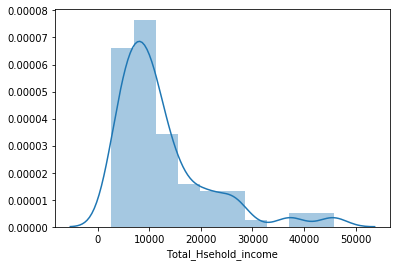

In [29]:
sns.distplot(df['Total_Hsehold_income'], bins = 10)

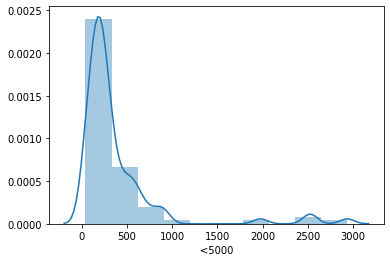

In [30]:
sns.distplot(df['<5000'], bins = 10)

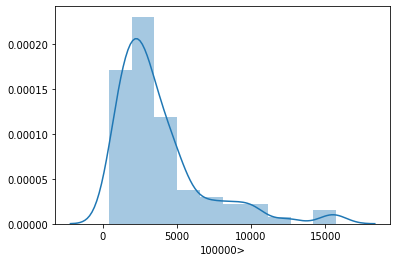

In [31]:
sns.distplot(df['100000>'], bins = 10)

In [32]:
## We are using the .loc function to selecte specific columns 

df1  = df.loc[:, ['Total_Hsehold_income','<5000', '5000_to_9999', '10000_to_14999', '15000_to_19999', '20000_to_24999', '25000_to_29999', '30000_to_34999', '35000_to_39999',
       '40000_to_44999', '45000_to_49999', '50000_to_59999', '60000_to_69999',
       '70000_to_79999', '80000_to_89999', '90000_to_99999', '100000>']]

In [33]:
df1.head()

,Total_Hsehold_income,<5000,5000_to_9999,10000_to_14999,15000_to_19999,20000_to_24999,25000_to_29999,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
0,26825,290,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,9340
1,3700,60,25,45,60,70,80,90,120,80,115,230,230,200,195,210,1890
2,19855,315,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,5570
3,18445,435,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,3980
4,10765,615,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625


In [34]:
df1_corr = df1.corr()['Total_Hsehold_income'][:-1]


In [35]:
df1_corr

Total_Hsehold_income    1.000000
<5000                   0.733463
5000_to_9999            0.861641
10000_to_14999          0.863000
15000_to_19999          0.875334
20000_to_24999          0.937615
25000_to_29999          0.937906
30000_to_34999          0.929097
35000_to_39999          0.942225
40000_to_44999          0.945661
45000_to_49999          0.956240
50000_to_59999          0.971704
60000_to_69999          0.983510
70000_to_79999          0.984807
80000_to_89999          0.986618
90000_to_99999          0.985163
Name: Total_Hsehold_income, dtype: float64

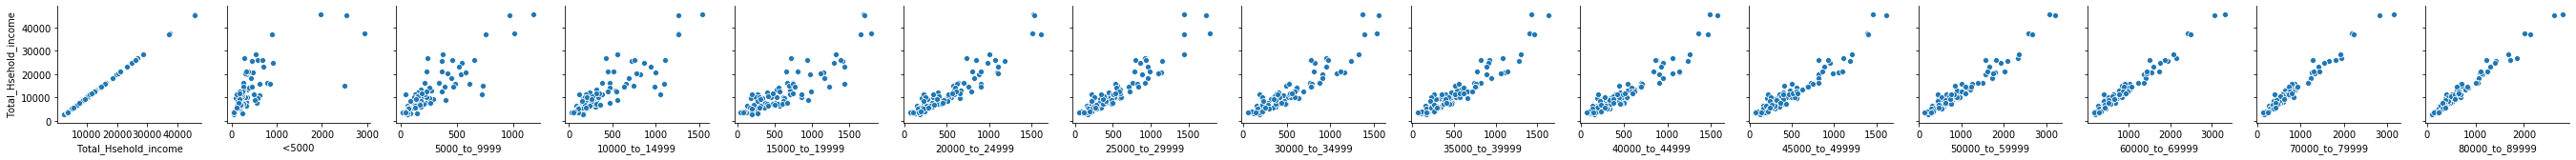

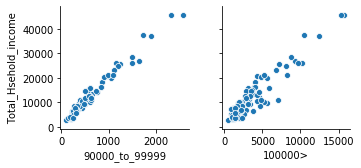

In [36]:

for i in range(0, len(df1.columns),15):
    
    
    sns.pairplot(df1, y_vars=['Total_Hsehold_income'], x_vars=df1.columns[i:i+15])

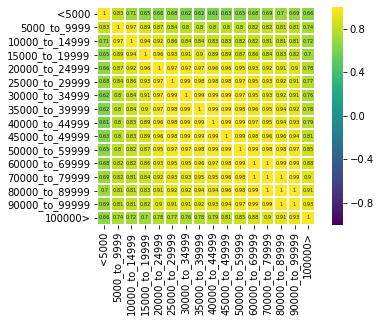

In [37]:
corr = df1.drop('Total_Hsehold_income', axis = 1).corr()
sns.heatmap(corr[(corr>=0.5) | (corr<= -0.4)], cmap = "viridis", vmax = 1.0,
            vmin = -1.0, linewidths = 1, 
            annot  = True, annot_kws={"size":5}, square = True);

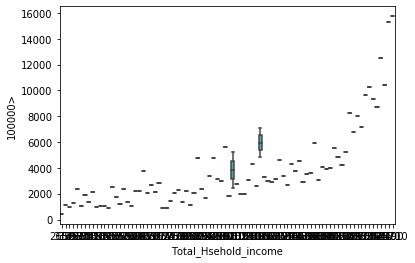

In [38]:
df1_box = sns.boxplot(x='Total_Hsehold_income', y = '100000>', data = df1)

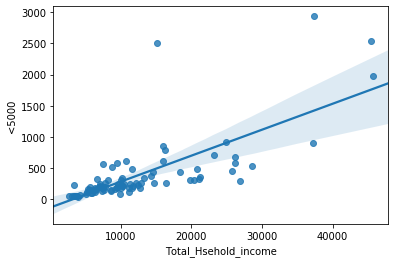

In [39]:
sns.regplot(df1['Total_Hsehold_income'], df1 ['<5000'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A876B3CC0>,
      dtype=object)

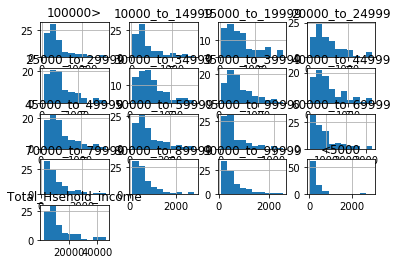

In [40]:
df1.hist(bins = 10, )


In [41]:
import folium
import requests
import geopandas 
import json
import geocoder

In [42]:
address = 'Toronto'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [43]:
map_toronto = folium.Map(location=[43.653963,-79.387207],zoom_start=10)

In [44]:
map_toronto

Text(0, 0.5, 'Population (%)')

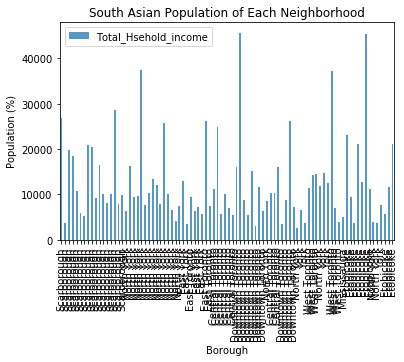

In [45]:
ax = df.plot(x='Borough', y=['Total_Hsehold_income'],kind='bar',alpha=0.75,title='South Asian Population of Each Neighborhood')
ax.set_ylabel('Population (%)')

In [46]:
CLIENT_ID = 'FPAEUOMQOUK1M32HQPL5A4PNEKOG3JCZSTFISKVFZWWHQ24M' # your Foursquare ID
CLIENT_SECRET = 'WPNU1OO5XOJUMMFP4UOOQBCM1XWO4IOXQMTXBELFDQMF3WJ4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FPAEUOMQOUK1M32HQPL5A4PNEKOG3JCZSTFISKVFZWWHQ24M
CLIENT_SECRET:WPNU1OO5XOJUMMFP4UOOQBCM1XWO4IOXQMTXBELFDQMF3WJ4


In [47]:
df.groupby(['Borough'])["Total_Hsehold_income"].value_counts(normalize=False)

Borough           Total_Hsehold_income
Central Toronto   5405                    1
                  5680                    1
                  7015                    1
                  10055                   1
                  10285                   1
                  10400                   1
                  11165                   1
                  15935                   1
                  24930                   1
Downtown Toronto  3125                    1
                  3395                    1
                  5520                    1
                  6330                    1
                  7325                    1
                  8685                    1
                  8740                    1
                  11555                   1
                  15075                   1
                  16000                   1
                  26130                   1
                  45710                   1
East Toronto      7470               

In [48]:
df.groupby(['Borough'])["Total_Hsehold_income"].value_counts(normalize=True)

Borough           Total_Hsehold_income
Central Toronto   5405                    0.111111
                  5680                    0.111111
                  7015                    0.111111
                  10055                   0.111111
                  10285                   0.111111
                  10400                   0.111111
                  11165                   0.111111
                  15935                   0.111111
                  24930                   0.111111
Downtown Toronto  3125                    0.083333
                  3395                    0.083333
                  5520                    0.083333
                  6330                    0.083333
                  7325                    0.083333
                  8685                    0.083333
                  8740                    0.083333
                  11555                   0.083333
                  15075                   0.083333
                  16000                   0

## Features Before One Hot Encoding 

In [49]:
df[[ '<5000','Total_Hsehold_income','5000_to_9999', '10000_to_14999', '15000_to_19999',
    '20000_to_24999', '25000_to_29999','30000_to_34999', '35000_to_39999','40000_to_44999', '45000_to_49999', '50000_to_59999', '60000_to_69999',
       '70000_to_79999', '80000_to_89999', '90000_to_99999', '100000>']].head()

,<5000,Total_Hsehold_income,5000_to_9999,10000_to_14999,15000_to_19999,20000_to_24999,25000_to_29999,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
0,290,26825,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,9340
1,60,3700,25,45,60,70,80,90,120,80,115,230,230,200,195,210,1890
2,315,19855,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,5570
3,435,18445,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,3980
4,615,10765,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625


In [50]:
## Borough', 'Population', 'Total_Hsehold_income', X axis to be used for the analysis

In [51]:
Feature = df[['<5000', 'Total_Hsehold_income','5000_to_9999', '10000_to_14999', '15000_to_19999',
    '20000_to_24999', '25000_to_29999','30000_to_34999', '35000_to_39999','40000_to_44999', '45000_to_49999', '50000_to_59999', '60000_to_69999',
       '70000_to_79999', '80000_to_89999', '90000_to_99999', '100000>']]
Feature.head()

,<5000,Total_Hsehold_income,5000_to_9999,10000_to_14999,15000_to_19999,20000_to_24999,25000_to_29999,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
0,290,26825,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,9340
1,60,3700,25,45,60,70,80,90,120,80,115,230,230,200,195,210,1890
2,315,19855,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,5570
3,435,18445,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,3980
4,615,10765,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625


## Clissification 

In [52]:
X = Feature


In [53]:
y = df['Borough']

In [54]:
y = df['Borough']

In [55]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.80026130e-01,  1.61898672e+00, -9.31238681e-02,
         4.51652280e-02,  2.84827220e-01,  5.83485734e-01,
         1.06844786e+00,  1.23309968e+00,  1.60271385e+00,
         1.53200958e+00,  1.76841533e+00,  2.06664965e+00,
         2.03785765e+00,  2.00841170e+00,  2.18563061e+00,
         2.20599430e+00,  1.81856378e+00],
       [-6.33226237e-01, -9.69651859e-01, -1.03030663e+00,
        -1.08825874e+00, -1.24620147e+00, -1.27956272e+00,
        -1.22216142e+00, -1.22534840e+00, -1.14497955e+00,
        -1.22715125e+00, -1.09824108e+00, -1.04760692e+00,
        -9.64814614e-01, -9.55677263e-01, -8.91140580e-01,
        -8.07164528e-01, -6.27881032e-01],
       [-1.30765248e-01,  8.38757063e-01,  1.21457300e+00,
         1.23903848e+00,  8.64762329e-01,  1.00690584e+00,
         9.73570554e-01,  1.09099285e+00,  1.02201576e+00,
         1.10752330e+00,  9.18502121e-01,  9.32170467e-01,
         8.02383124e-01,  8.51902998e-01,  8.71010190e-01,
         9.62802898e-01,  5.8

## Clasification 

Now, we are  using the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Note:__ 
We will change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
We will use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
We will also include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy We will can split our New_toronto_test2.csv into train and test to find the best **K**.

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (70, 17) (70,)
Test set: (18, 17) (18,)


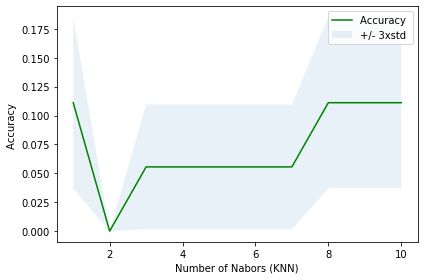

In [57]:
from sklearn import metrics
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (KNN)')
plt.tight_layout()
plt.show()

In [58]:
KNN =7
KNNeig = KNeighborsClassifier(n_neighbors = KNN).fit(X,y)

## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
TrainTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
TrainTree.fit(X,y)
TrainTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Surport Vector Machien

In [61]:
from sklearn import svm

In [62]:
clf = svm.SVC(kernel='rbf')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Logistics Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)
LR

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evalution Using Test Set

In [65]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## Loading Our Data set

In [66]:
Testdf = pd.read_csv('New_toronto_test2.csv')
Testdf.head()

,PostalCode,Borough,Neighbourhood No.,Population,Poplatn dens persqur km,Land area in squr km,Total_Hsehold_income,<5000,5000_to_9999,10000_to_14999,...,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,...,955,1090,1055,1110,2330,2150,1930,1845,1640,9340
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,...,90,120,80,115,230,230,200,195,210,1890
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,...,905,885,905,815,1565,1360,1255,1140,1050,5570
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,...,910,950,955,815,1725,1405,1240,1070,865,3980
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,...,465,520,495,530,935,845,765,615,575,2625


In [67]:
Testdf.columns = Testdf.columns.str.replace(' ','')

In [68]:
Testdf.dropna().head()

,PostalCode,Borough,NeighbourhoodNo.,Population,Poplatndenspersqurkm,Landareainsqurkm,Total_Hsehold_income,<5000,5000_to_9999,10000_to_14999,...,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
0,M1B,Scarborough,263,90290,6208,45.74,26825,290,240,420,...,955,1090,1055,1110,2330,2150,1930,1845,1640,9340
1,M1C,Scarborough,134,12494,2403,5.20,3700,60,25,45,...,90,120,80,115,230,230,200,195,210,1890
2,M1E,Scarborough,411,54764,8570,19.04,19855,315,540,815,...,905,885,905,815,1565,1360,1255,1140,1050,5570
3,M1G,Scarborough,137,53485,4345,12.31,18445,435,455,685,...,910,950,955,815,1725,1405,1240,1070,865,3980
4,M1H,Scarborough,127,29960,4011,7.47,10765,615,220,255,...,465,520,495,530,935,845,765,615,575,2625


In [69]:
df.groupby(['Borough'])["Total_Hsehold_income"].value_counts(normalize=True)

Borough           Total_Hsehold_income
Central Toronto   5405                    0.111111
                  5680                    0.111111
                  7015                    0.111111
                  10055                   0.111111
                  10285                   0.111111
                  10400                   0.111111
                  11165                   0.111111
                  15935                   0.111111
                  24930                   0.111111
Downtown Toronto  3125                    0.083333
                  3395                    0.083333
                  5520                    0.083333
                  6330                    0.083333
                  7325                    0.083333
                  8685                    0.083333
                  8740                    0.083333
                  11555                   0.083333
                  15075                   0.083333
                  16000                   0

In [70]:
Testdf[[ '<5000','Total_Hsehold_income','5000_to_9999', '10000_to_14999', '15000_to_19999',
    '20000_to_24999', '25000_to_29999','30000_to_34999', '35000_to_39999','40000_to_44999', '45000_to_49999', '50000_to_59999', '60000_to_69999',
       '70000_to_79999', '80000_to_89999', '90000_to_99999', '100000>']].head()

,<5000,Total_Hsehold_income,5000_to_9999,10000_to_14999,15000_to_19999,20000_to_24999,25000_to_29999,30000_to_34999,35000_to_39999,40000_to_44999,45000_to_49999,50000_to_59999,60000_to_69999,70000_to_79999,80000_to_89999,90000_to_99999,100000>
0,290,26825,240,420,720,730,925,955,1090,1055,1110,2330,2150,1930,1845,1640,9340
1,60,3700,25,45,60,70,80,90,120,80,115,230,230,200,195,210,1890
2,315,19855,540,815,970,880,890,905,885,905,815,1565,1360,1255,1140,1050,5570
3,435,18445,455,685,1170,825,960,910,950,955,815,1725,1405,1240,1070,865,3980
4,615,10765,220,255,450,370,475,465,520,495,530,935,845,765,615,575,2625


In [71]:
TestFeatures = Testdf[[ '<5000','Total_Hsehold_income','5000_to_9999', '10000_to_14999', '15000_to_19999',
    '20000_to_24999', '25000_to_29999','30000_to_34999', '35000_to_39999','40000_to_44999', '45000_to_49999', '50000_to_59999', '60000_to_69999',
       '70000_to_79999', '80000_to_89999', '90000_to_99999', '100000>']]

TestFeatures.shape

(88, 17)

In [72]:
Test_X = Testdf[[ '<5000','Total_Hsehold_income','5000_to_9999', '10000_to_14999', '15000_to_19999',
    '20000_to_24999', '25000_to_29999','30000_to_34999', '35000_to_39999','40000_to_44999', '45000_to_49999', '50000_to_59999', '60000_to_69999',
       '70000_to_79999', '80000_to_89999', '90000_to_99999', '100000>']]
ytest=Testdf['Borough'].values
Test_X= preprocessing.StandardScaler().fit(TestFeatures).transform(TestFeatures)
Test_X.shape

(88, 17)

## Accuracy for K_NN MEAN

In [73]:
Yhat = KNNeig.predict(Test_X)
print('Jaccard similarity:',jaccard_similarity_score(ytest, Yhat))
print('F1-score:',f1_score(ytest, Yhat,average='weighted'))

Jaccard similarity: 0.38636363636363635
F1-score: 0.31706081081081083


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Accuracy for Decision Tree

In [74]:
predTree = TrainTree.predict(Test_X)
print('Jaccard similarity:',jaccard_similarity_score(ytest, predTree))
print('F1-score:',f1_score(ytest, predTree,average='weighted'))

Jaccard similarity: 0.5113636363636364
F1-score: 0.448756287572077


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Accuracy for SVM

In [75]:
y_pred = clf.predict(Test_X)
print('Jaccard similarity:',jaccard_similarity_score(ytest, y_pred))
print('F1-score:',f1_score(ytest, y_pred,average='weighted'))

Jaccard similarity: 0.32954545454545453
F1-score: 0.23562887529957613


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Accuracy for Logistics regression

In [76]:
yhat = LR.predict(Test_X)
print('Jaccard similarity:',jaccard_similarity_score(ytest, yhat))
print('F1-score:',f1_score(ytest, yhat,average='weighted'))
yhat_prob = LR.predict_proba(Test_X)
print('LogLoss:',log_loss(ytest, yhat_prob))

Jaccard similarity: 0.32954545454545453
F1-score: 0.2679189817032283
LogLoss: 2.2518772673365364


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Report

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.38    | 0.31        | NA      |
| Decision Tree      | 0.51    | 0.45       | NA      |
| SVM                | 0.32    | 0.23        | NA      |
| LogisticRegression | 0.32    | 0.26       | 2.25    |
